## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tenso

In [2]:
# 匯入資料
train, test = keras.datasets.cifar10.load_data()

# 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
        """Code Here
        建立你的神經網路
        """
        input_layer = keras.layers.Input(input_shape)
    
        for i, n_units in enumerate(num_neurons):
            if i == 0:
                x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            else:
                x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)

        out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

        model = keras.models.Model(inputs=[input_layer], outputs=[out])
        return model

In [22]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95,0.8,0.5]
NESTEROV=[True,False]

In [23]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}

#使用迴圈，建立不同 mpmentum / nestrov 的模型並訓練
for n in NESTEROV:
    for m in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %.2f" % (m),'/','NESTEROV = ', n)
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=n, momentum=m)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "momentum=%s" % str(m)+'nesterov=%s' %str(n)
        results[exp_name_tag] = {'train-loss': train_loss,
                                     'valid-loss': valid_loss,
                                     'train-acc': train_acc,
                                     'valid-acc': valid_acc}
        


Experiment with MOMENTUM = 0.95 / NESTEROV =  True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
500

50000/50000 [==============================] - 12s 248us/step - loss: 0.3994 - accuracy: 0.8567 - val_loss: 2.2532 - val_accuracy: 0.5237
Epoch 49/50
50000/50000 [==============================] - 12s 235us/step - loss: 0.3852 - accuracy: 0.8620 - val_loss: 2.2103 - val_accuracy: 0.5267
Epoch 50/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.3757 - accuracy: 0.8660 - val_loss: 2.3786 - val_accuracy: 0.5117
Experiment with MOMENTUM = 0.80 / NESTEROV =  True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________

50000/50000 [==============================] - 12s 232us/step - loss: 0.7421 - accuracy: 0.7399 - val_loss: 1.5521 - val_accuracy: 0.5155
Epoch 46/50
50000/50000 [==============================] - 12s 233us/step - loss: 0.7258 - accuracy: 0.7455 - val_loss: 1.6004 - val_accuracy: 0.5083
Epoch 47/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.7055 - accuracy: 0.7511 - val_loss: 1.5483 - val_accuracy: 0.5262
Epoch 48/50
50000/50000 [==============================] - 12s 249us/step - loss: 0.6968 - accuracy: 0.7554 - val_loss: 1.8373 - val_accuracy: 0.4773
Epoch 49/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.6815 - accuracy: 0.7625 - val_loss: 1.6369 - val_accuracy: 0.5164
Epoch 50/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.6743 - accuracy: 0.7636 - val_loss: 1.6787 - val_accuracy: 0.5061
Experiment with MOMENTUM = 0.50 / NESTEROV =  True
Model: "model_1"
____________________________________________

50000/50000 [==============================] - 12s 233us/step - loss: 1.1067 - accuracy: 0.6116 - val_loss: 1.4501 - val_accuracy: 0.4929
Epoch 43/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.0955 - accuracy: 0.6162 - val_loss: 1.7304 - val_accuracy: 0.4463
Epoch 44/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.0905 - accuracy: 0.6173 - val_loss: 1.3750 - val_accuracy: 0.5107
Epoch 45/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.0793 - accuracy: 0.6213 - val_loss: 1.5865 - val_accuracy: 0.4663
Epoch 46/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.0715 - accuracy: 0.6250 - val_loss: 1.5134 - val_accuracy: 0.4892
Epoch 47/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.0606 - accuracy: 0.6280 - val_loss: 1.4282 - val_accuracy: 0.5036
Epoch 48/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.0531 - accuracy: 0.6315 - va

50000/50000 [==============================] - 11s 214us/step - loss: 0.7687 - accuracy: 0.7250 - val_loss: 1.5223 - val_accuracy: 0.5309
Epoch 40/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.7501 - accuracy: 0.7302 - val_loss: 1.5407 - val_accuracy: 0.5258
Epoch 41/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.7468 - accuracy: 0.7299 - val_loss: 1.5807 - val_accuracy: 0.5221
Epoch 42/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.7206 - accuracy: 0.7415 - val_loss: 1.5441 - val_accuracy: 0.5279
Epoch 43/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.7349 - accuracy: 0.7358 - val_loss: 1.5354 - val_accuracy: 0.5281
Epoch 44/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.7271 - accuracy: 0.7366 - val_loss: 1.5925 - val_accuracy: 0.5268
Epoch 45/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.7066 - accuracy: 0.7448 - va

50000/50000 [==============================] - 11s 212us/step - loss: 0.9088 - accuracy: 0.6771 - val_loss: 1.3883 - val_accuracy: 0.5290
Epoch 37/50
50000/50000 [==============================] - 11s 210us/step - loss: 0.8992 - accuracy: 0.6816 - val_loss: 1.4454 - val_accuracy: 0.5183
Epoch 38/50
50000/50000 [==============================] - 11s 211us/step - loss: 0.8763 - accuracy: 0.6895 - val_loss: 1.4104 - val_accuracy: 0.5364
Epoch 39/50
50000/50000 [==============================] - 11s 212us/step - loss: 0.8565 - accuracy: 0.6956 - val_loss: 1.5497 - val_accuracy: 0.5036
Epoch 40/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.8467 - accuracy: 0.7007 - val_loss: 1.4879 - val_accuracy: 0.5201
Epoch 41/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.8346 - accuracy: 0.7041 - val_loss: 1.3746 - val_accuracy: 0.5430
Epoch 42/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.8124 - accuracy: 0.7133 - va

50000/50000 [==============================] - 11s 217us/step - loss: 1.1604 - accuracy: 0.5919 - val_loss: 1.4162 - val_accuracy: 0.5113
Epoch 34/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.1498 - accuracy: 0.5947 - val_loss: 1.3659 - val_accuracy: 0.5161
Epoch 35/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.1372 - accuracy: 0.6002 - val_loss: 1.5169 - val_accuracy: 0.4740
Epoch 36/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.1302 - accuracy: 0.6017 - val_loss: 1.6203 - val_accuracy: 0.4513
Epoch 37/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.1240 - accuracy: 0.6067 - val_loss: 1.3574 - val_accuracy: 0.5213
Epoch 38/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.1127 - accuracy: 0.6069 - val_loss: 1.3512 - val_accuracy: 0.5163
Epoch 39/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.0967 - accuracy: 0.6132 - va

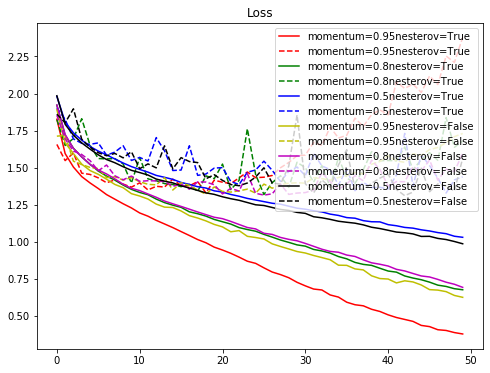

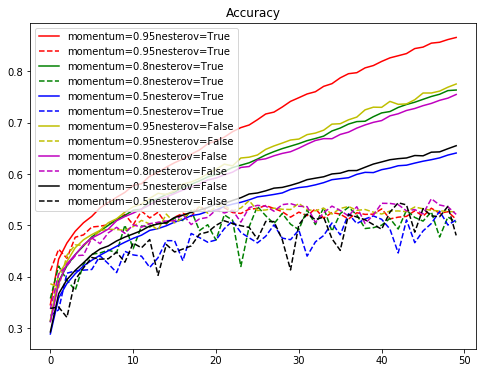

In [24]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()